In [41]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import os
# from io import StringIO
import io
from PIL import Image
import matplotlib.pyplot as plt
import time
import tensorflow as tf
%matplotlib inline

/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [52]:
def load_dataset():
    def load_images(filename):
        if (os.path.exists(filename)):
            # print filename
            np_imgs = []
            zf = ZipFile(filename, 'r')
            # print len(zf.namelist())
            # sizes = []
            # TODO: put len(zf.namelist())
            for i in range(1, 15):
                data = io.BytesIO(zf.read(zf.namelist()[i]))
                img = Image.open(data)
                np_imgs.append(np.array(img))
            return np_imgs

    def load_labels(filename):
        if (os.path.exists(filename)):
            # print filename
            return pd.read_csv(ZipFile(filename, 'r').open('labels.csv'))

    X_train = load_images('data/train.zip')
    Y_train = load_labels('data/labels.csv.zip')
    # X_test = []
    X_test = load_images('data/test.zip')
    return X_train, Y_train, X_test

In [53]:
X_train_orig, Y_train_orig, X_test_orig = load_dataset()
# print X_train
# print Y_train

(500, 375, 3)


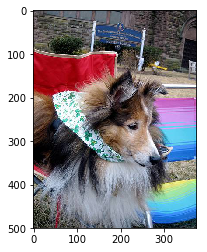

In [15]:
print(X_train_orig[10].shape)
plt.imshow(X_train_orig[10])

(500, 388, 3)


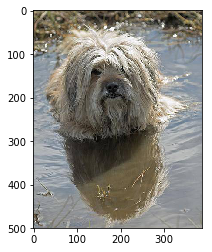

In [16]:
print(X_test_orig[10].shape)
plt.imshow(X_test_orig[10])

In [ ]:
#######################################################################################

In [46]:
Y_sample = pd.read_csv(ZipFile('data/sample_submission.csv.zip', 'r').open('sample_submission.csv'))

In [16]:
Y_sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [17]:
all_breeds = list(Y_sample.columns)
print(all_breeds)

['id', 'affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier',

In [18]:
Y_train_orig.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [19]:
Y_train = pd.DataFrame(columns=all_breeds)

In [20]:
Y_train

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [21]:
Y_train['id'] = Y_train_orig['id']

In [64]:
Y_train.sample(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
9439,ecccfab92b35ee51d1896eb35f5379a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8040,c90d5026d84f6f6ff79d8e4e0c503826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7271,b6281e28d445000d206c5d89af27335c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,21aed4cfca90bf4db05c1c7542009ab7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4614,7357a7f342db3222cb79574d2225d80d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,0bbe00ace11a4dd944b8bcf8ca9772c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4986,7da8b8bc4de7303c3142d05059b6c4da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3592,594ab95be088c207c235d9af32dad5a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,2ec08fcce1e1e8a126887620cd74942e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8231,cdd98aebbc986af83308c15269c14e66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
Y_train_inter = Y_train_orig.copy(deep=True)

Y_train_inter = Y_train_inter

# Y_train_inter

In [66]:
# Manipulating breed text into class number
# TODO: add Y_train_inter['class'] = i
for i, breed in enumerate(all_breeds):
    # print(i, breed)
    print(Y_train_inter[Y_train_inter['breed'] == breed])
    # temp = Y_train_inter[Y_train_inter['breed'] == breed]
    # temp['class'] = i

Empty DataFrame
Columns: [id, breed]
Index: []
                                     id          breed
30     00ca18751837cd6a22813f8e221f7819  affenpinscher
44     01268f0007876a692907bda89468184c  affenpinscher
56     0162107acd8f2588c0944b791d61bb0c  affenpinscher
172    040fef64640b89c53f161b6c5215b78b  affenpinscher
194    0484a6cc686a07e1edacd0fb44b1d965  affenpinscher
658    100f347ec78a42a9e7c2418e4beb3f6a  affenpinscher
673    106d7e0df869e7ba9f6d16c5f77ddfb8  affenpinscher
691    10edc6f98c2423e4e195e09a86b0d292  affenpinscher
719    11b60d8d86f14a601ca290909a17cbc6  affenpinscher
1002   18b4e732c105272f40956c2f85813bcb  affenpinscher
1036   19a8c1698819d382c3ead14bdc1a360b  affenpinscher
1041   19de1db12b3ddc7f2af6d9453c977083  affenpinscher
1045   1a012faf98b32039adc17ee708bcb360  affenpinscher
1076   1aa98488ce65f9b57b468ccde4f1cad8  affenpinscher
1249   1ee0c041d15647e3909625eba419f153  affenpinscher
1300   20430175869defec1722d3432f42ebd7  affenpinscher
1375   21cc2409dba

                                    id    breed
134   0326344e0d5181130c28d25edd5627e4  clumber
186   044f7e60953230fa45e4367073d96693  clumber
204   04cce0cd53c6f01d242a49e43de513a1  clumber
307   076d31a2f676671e4427cc485b9d2918  clumber
314   079f6255a19fdbaa75fb2a902bca894c  clumber
530   0d0d0f7c689020c35b83a91e7717624b  clumber
730   12078d0ea135483e4bc48e2f13678588  clumber
748   12a96a9c366b60dcc62fec29006780a3  clumber
970   17e00d79ad69729522d8705e95939f01  clumber
1318  20a139198997995cf225389a269a02a1  clumber
1495  24fdea7f3df1b2a7e2cc4100b7af81ac  clumber
1562  269df6c511205e34bd1bc968351b6277  clumber
1580  272cfd49116ccb386971218dca0f62ae  clumber
1597  277fb3822b1c07eeae9346ec61c99028  clumber
1678  299c6788d1b91d1553a54a3fa9de2959  clumber
1805  2caf050afc8dad52c1e250eaec964bf5  clumber
2226  37bb10379fafdff135f71ac489434f2c  clumber
2309  3992fe6af13ed5db7e478c6bf95f1fbc  clumber
2554  3f974ba3e0c33d02274cc3889d146a74  clumber
2671  420126aac6b2cb9cc91ea89dc9c03e8f  

                                     id             breed
293    071652f5f5d0bf00983c075e96ad725f  japanese_spaniel
335    080ec59213ed7425b7f8c169955bb9d0  japanese_spaniel
387    095d868f796f86c8258750365a04f2cd  japanese_spaniel
515    0c71084d955bfca989d865cbcf8cf8ae  japanese_spaniel
653    0fe613c90931a021ad3716dcb9a5f270  japanese_spaniel
666    1041e0480ed0b88c41169fb2b119fcf7  japanese_spaniel
668    104a6182cff3f37406fb77b7f0c40402  japanese_spaniel
880    156d6d6ef7da47aa22b150268af9a3c4  japanese_spaniel
912    166d9a55197d0c21068273cca67fe2aa  japanese_spaniel
1075   1aa93eed3e45396d5fb4397821160317  japanese_spaniel
1133   1c2cc24dd7a94cf6ca34b7c9231dd1ce  japanese_spaniel
1456   2443cefb98478664bb7804064f39c002  japanese_spaniel
1592   276d0fd62b4f9801ee2cfc6b01530ada  japanese_spaniel
1794   2c752e987acb54f4d5e553d493ca9470  japanese_spaniel
1847   2d8945b0a70d3a37960020113c2d118f  japanese_spaniel
1963   30668e8d4c74c185ef86f86d9ff158a4  japanese_spaniel
2043   32dfc20

                                    id    breed
17    007b8a07882822475a4ce6581e70b1f8  redbone
284   06d2d84b936225e6c853a0453cb9c878  redbone
374   09037f0995111a413fd8e976f3680f09  redbone
381   09438173067ccee8d4a1a45f2f8a8eb6  redbone
413   09ea184490e5da33eb3d851ee6361941  redbone
419   0a13f9596e03a9f87c96aaff6e057048  redbone
430   0a5f744c5077ad8f8d580081ba599ff5  redbone
669   104f3118ce7eba3e48138ccaa201f25a  redbone
720   11bbd6229f14cc68bd0f157a9ef1d47d  redbone
733   122abc906f3215996cbcccf63c8fc89c  redbone
894   15d17b41ac5230af8f31417f0a673915  redbone
1021  1935abc5226ad6d2cdcaed722d685623  redbone
1203  1dd2cef96311451ff368a1b49babd1d1  redbone
1303  204b3f0122be057881d4cc6794bf48a6  redbone
1521  259b55fcffdd850aac00d034b090c56c  redbone
1538  26096ea4a2c7e6100e4b434ffe57ab2c  redbone
1656  2918212b7adcfefa9640c778c21cbf6b  redbone
2437  3ca6b28ce9d3d1222acb030225ae244c  redbone
2486  3df5d07bc814c7d1805ea4842ead9819  redbone
2496  3e29d8011993955d89dd45dd2373a8e5  

In [68]:
# Y_train_inter

In [69]:
# for i, row in Y_train_orig.iterrows():
#     print(i)
#     print(row['id'])
#     print(row['breed'])
#     # print(Y_train[Y_train['id'] = row['id']])
#     print('***')